# Zero-Shot Image Classification

This example shows how [SentenceTransformers](https://www.sbert.net) can be used to map images and texts to the same vector space. 

We can use this to perform **zero-shot image classification** by providing the names for the labels.

As model, we use the [OpenAI CLIP Model](https://github.com/openai/CLIP), which was trained on a large set of images and image alt texts.


The images in this example are from [Unsplash](https://unsplash.com/).

In [7]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm
import torch

# We use the original CLIP model for computing image embeddings and English text embeddings
en_model = SentenceTransformer('clip-ViT-B-32')

In [16]:
# We download some images from our repository which we want to classify
img_names = ['eiffel-tower-day.jpg', 'eiffel-tower-night.jpg', 'two_dogs_in_snow.jpg', 'cat.jpg']
url = 'https://github.com/UKPLab/sentence-transformers/raw/master/examples/applications/image-search/'
for filename in img_names:
    if not os.path.exists(filename):
        util.http_get(url+filename, filename)

# And compute the embeddings for these images
img_emb = en_model.encode([Image.open(filepath) for filepath in img_names], convert_to_tensor=True)

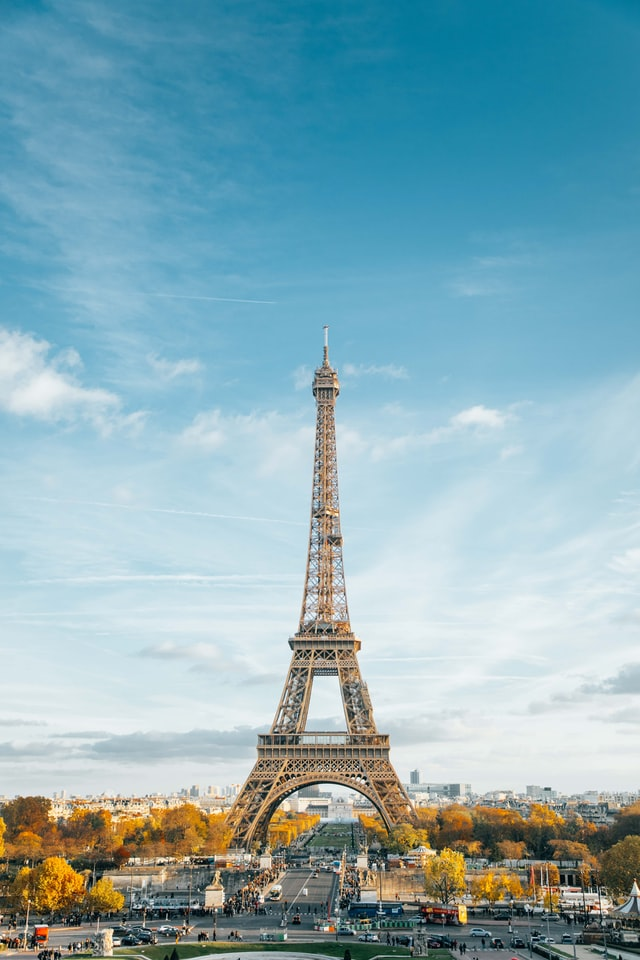

Predicted label: Paris





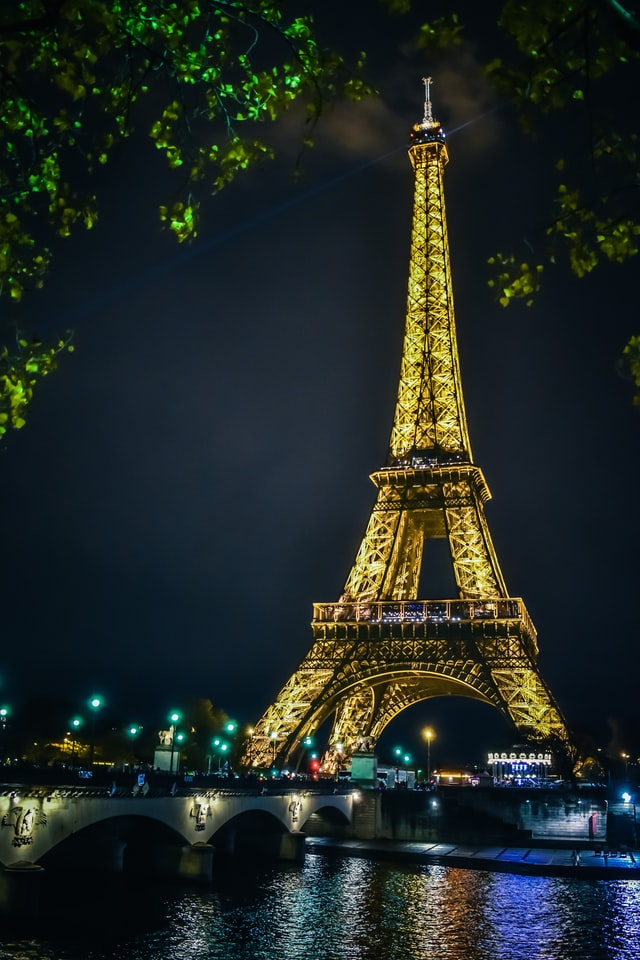

Predicted label: Paris at night





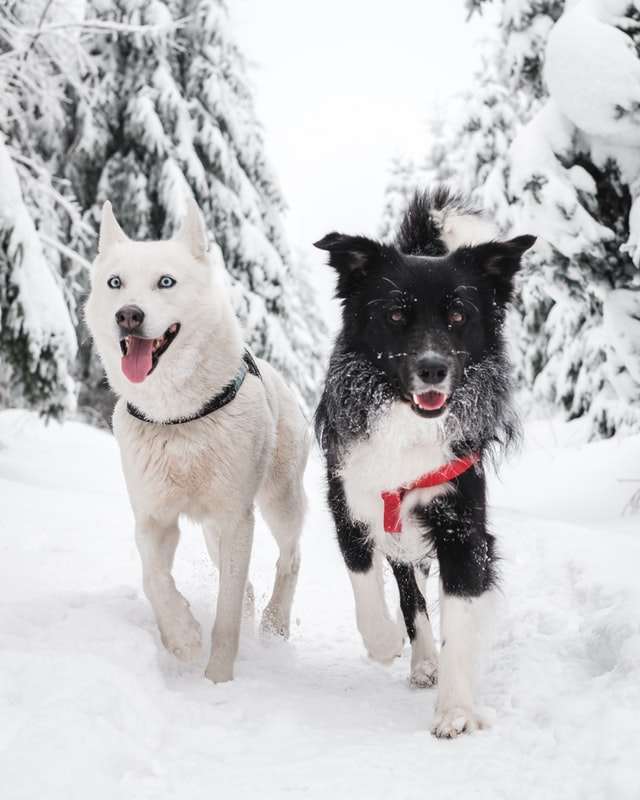

Predicted label: dog





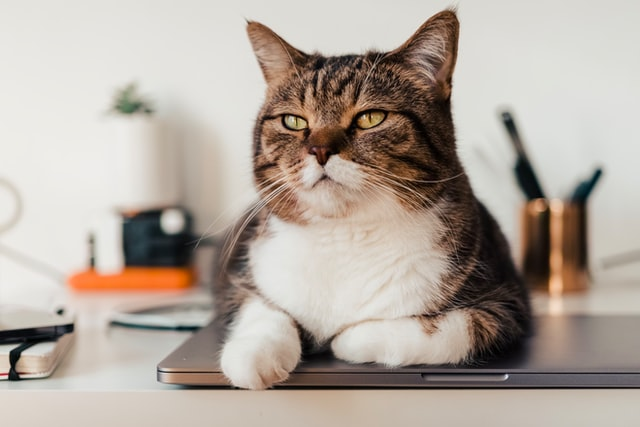

Predicted label: cat





In [20]:
# Then, we define our labels as text. Here, we use 4 labels
labels = ['dog', 'cat', 'Paris at night', 'Paris']

# And compute the text embeddings for these labels
en_emb = en_model.encode(labels, convert_to_tensor=True)

# Now, we compute the cosine similarity between the images and the labels
cos_scores = util.cos_sim(img_emb, en_emb)

# Then we look which label has the highest cosine similarity with the given images
pred_labels = torch.argmax(cos_scores, dim=1)

# Finally we output the images + labels
for img_name, pred_label in zip(img_names, pred_labels):
    display(IPImage(img_name, width=200))
    print("Predicted label:", labels[pred_label])
    print("\n\n")



# Zero-Shot Image Classification
The original CLIP Model only works for English, hence, we used [Multilingual Knowlegde Distillation](https://arxiv.org/abs/2004.09813) to make this model work with 50+ languages.

For this, we msut load the *clip-ViT-B-32-multilingual-v1* model to encode our labels.
We can define our labels in 50+ languages and can also mix the languages we have

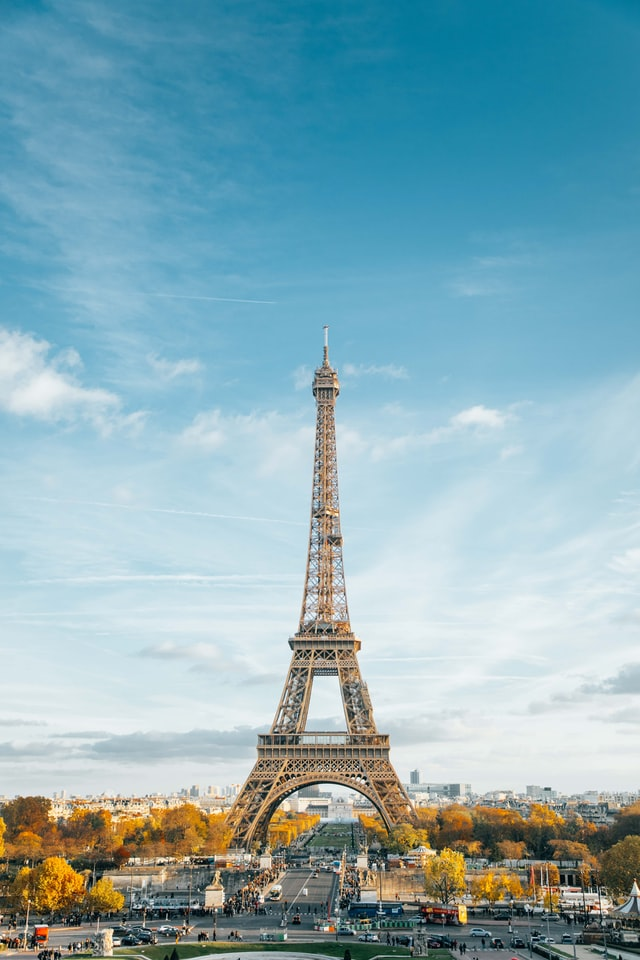

Predicted label: Париж





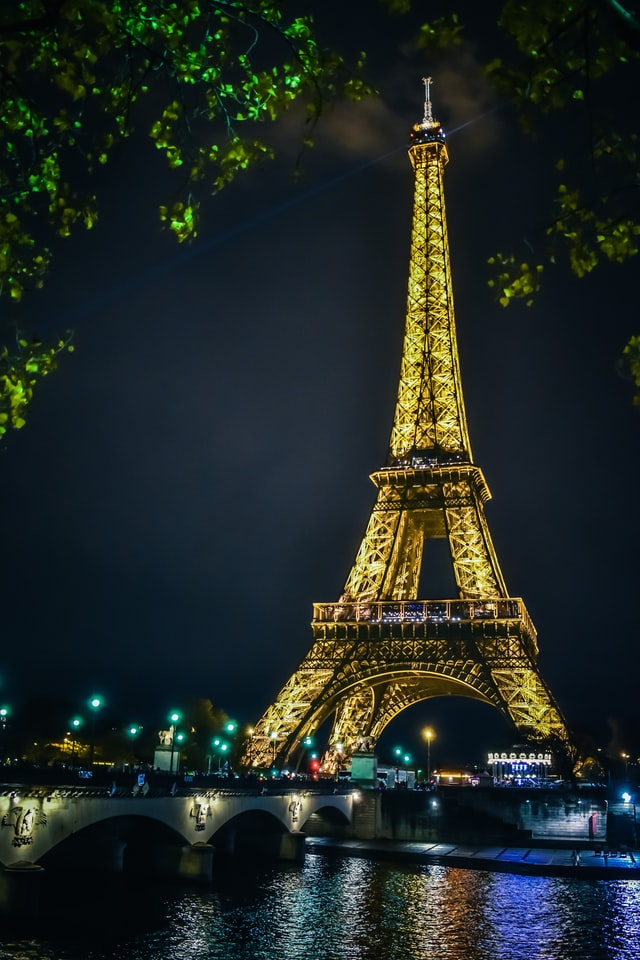

Predicted label: 巴黎晚上





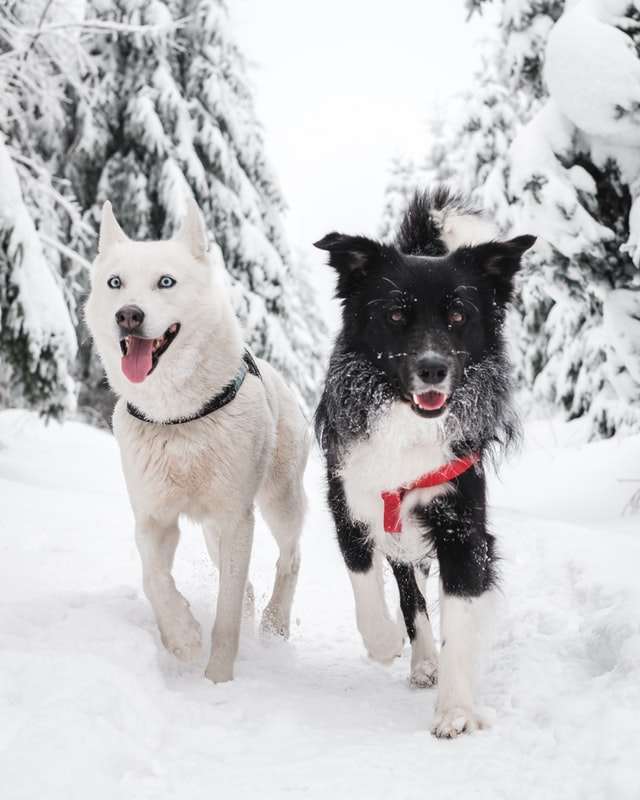

Predicted label: Hund





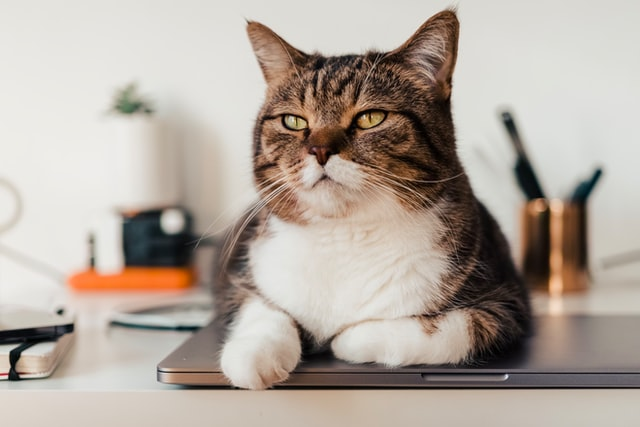

Predicted label: gato





In [21]:
multi_model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

# Then, we define our labels as text. Here, we use 4 labels
labels = ['Hund',     # German: dog
          'gato',     # Spanish: cat 
          '巴黎晚上',  # Chinese: Paris at night
          'Париж'     # Russian: Paris
         ]

# And compute the text embeddings for these labels
txt_emb = multi_model.encode(labels, convert_to_tensor=True)

# Now, we compute the cosine similarity between the images and the labels
cos_scores = util.cos_sim(img_emb, txt_emb)

# Then we look which label has the highest cosine similarity with the given images
pred_labels = torch.argmax(cos_scores, dim=1)

# Finally we output the images + labels
for img_name, pred_label in zip(img_names, pred_labels):
    display(IPImage(img_name, width=200))
    print("Predicted label:", labels[pred_label])
    print("\n\n")